- **DT intuition**


- **How to split the nodes?**


- **Entropy**


- **Building a DT intuition**


- **Visualizing the process of building DT**

- **Sklearn implementation**

- Gini Impurity


- Overfit vs. Underfit

- Hyperparameter Tuning

- Visualizing DT

- Feature importance

- Interview que
    - Important terminology
    - Impact of Outliers
    - Data Imbalance
    - Space and time complexity
    - Using same column twice for split
    - Using DT for regression


## UseCase Intro: Employee Attrition
### You are a Data Scientist working at a Jio

- The company is facing a huge problem of employee attrition
- Your task is to help the company find a solution to this problem.

#### Why is attrition a problem?

  - A new employee asks for more compensation
  - Training of new employees
  - Lots of time and resources required for searching a new candidate


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/781/original/Screenshot_2023-07-28_at_11.12.39_AM.png?1690523151 width=700>


#### What can be done to solve the problem ?

1. Identify the employees who may leave in future.
  - Targeted approaches can be undertaken to retain such employees.
  - These might include addressing their problems with the company and so on ...

2. Help identify the key indicators/factors leading to an employee leaving.
  - #### What all reasons can you think of contributing to attrition ?
    - Forcing employees to come to office daily
    - Unhealthy culture etc
  - Identifying these key factors helps in taking better measures to improve employee retention

#### Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [ ]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 91.6MB/s]


In [ ]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Data Dictionary

Feature  | Description
-------------------|------------------
Age	| The age of the employee. (Numerical)
Attrition |	Whether or not the employee has left the organization. (Categorical)
BusinessTravel |	The frequency of business travel for the employee. (Categorical)
DailyRate| 	The daily rate of pay for the employee. (Numerical)
Department |	The department the employee works in. (Categorical)
DistanceFromHome |	The distance from home in miles for the employee. (Numerical)
Education |	The level of education achieved by the employee. (Categorical)
EducationField |	The field of study for the employee's education. (Categorical)
EmployeeCount |	The total number of employees in the organization. (Numerical)
EmployeeNumber |	A unique identifier for each employee profile. (Numerical)
EnvironmentSatisfaction | 	The employee's satisfaction with their work environment. (Categorical)
Gender | 	The gender of the employee. (Categorical)
HourlyRate | 	The hourly rate of pay for the employee. (Numerical)
JobInvolvement| The level of involvement required for the employee's job. (Categorical)
JobLevel |	The job level of the employee. (Categorical)
JobRole |	The role of the employee in the organization. (Categorical)
JobSatisfaction |	The employee's satisfaction with their job. (Categorical)
MaritalStatus | 	The marital status of the employee. (Categorical)
MonthlyIncome |	The monthly income of the employee. (Numerical)
MonthlyRate |The monthly rate of pay for the employee. (Numerical)
NumCompaniesWorked | 	The number of companies the employee has worked for. (Numerical)
Over18 |	Whether or not the employee is over 18. (Categorical)
OverTime |	Whether or not the employee works overtime. (Categorical)
PercentSalaryHike |	The percentage of salary hike for the employee. (Numerical)
PerformanceRating |	The performance rating of the employee. (Categorical)
RelationshipSatisfaction |	The employee's satisfaction with their relationships. (Categorical)
StandardHours |	The standard hours of work for the employee. (Numerical)
StockOptionLevel |	The stock option level of the employee. (Numerical)
TotalWorkingYears |	The total number of years the employee has worked. (Numerical)
TrainingTimesLastYear | 	The number of times the employee was taken for training in the last year. (Numerical)
WorkLifeBalance |	The employee's perception of their work-life balance. (Categorical)
YearsAtCompany |	The number of years the employee has been with the company. (Numerical)
YearsInCurrentRole |	The number of years the employee has been in their current role. (Numerical)
YearsSinceLastPromotion | 	The number of years since the employee's last promotion. (Numerical)
YearsWithCurrManager	| The number of years the employee has been with their current manager. (Numerical)

In [ ]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Summary of EDA and Preprocessing

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/782/original/Screenshot_2023-07-28_at_11.12.47_AM.png?1690523216 width=700>

We perform EDA followed by preprocessing on the data which is covered in the post read

#### Post Read - Employee Attrition Usecase

Employee EDA: https://colab.research.google.com/drive/1OdxmAv5q-92ll5Jf8XrDYQp-4-mitgC8?usp=sharing

#### Final dataset after preprocessing

In [ ]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 129MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 94.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 68.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 35.7MB/s]


In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [ ]:
# train data shape
X_train.shape

(1848, 36)

In [ ]:
# test data shape
X_test.shape

(368, 36)

In [ ]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## DT intuition

Say, we have attrition data with 2 features
- Age
- Overtime

When we plot the data, it looks something like this :

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/783/original/Screenshot_2023-07-28_at_11.12.53_AM.png?1690523246 width=700>







#### Can we use logistic regression to classify this data ?

**No** as it is a **linear model** and we have **non linear data** with us.

- Logistic regression will not perform well in this case.


#### Can we use KNN to solve this problem ?


**Yes** as it works on assumptions that
- neighbourhood should be homogenous
- i.e. datapoints belonging to same class are close to each other.

This assumption is valid here.


#### But, KNN has a big disadvantage



- We **can't productionize** KNN for large datasets

**Why?**

Because entire training data is used every time we make an inference.

So, it will be difficult to use KNN in this case.


Let's try something else.


Let's try to **split** the data into regions using **axis parallel hyperplanes**

The splitted region  along with decision boundaries will look like :

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/784/original/Screenshot_2023-07-28_at_11.13.00_AM.png?1690523302 width=700>

With the help of these hyperplanes,
- we can represent these **homogenous splitted region** using **if else conditions**

Let's see how it looks like :

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/785/original/Screenshot_2023-07-28_at_11.13.06_AM.png?1690523371 width=700>

Now, that we have the conditions with us

Let's try to represent these conditions digramatically:

Notice that
- This is resembling a **tree structure**

where
- **top most node** is called **root node**
- **Bottom most node** is called **leaf node**
- and **the nodes in between** them are called **Internal node**


This is called a **Decision Tree**



#### Visualization

Here's an visualization to help you understand how we use these axis parallel hyperplane to split the data.

https://mlu-explain.github.io/decision-tree/

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/170/856/original/DT_-_visualization.gif?1765807302' width=600>




Notice that
- how easily it is able to classify multiclass data

- which might have been an overhead if we decided to use logistic regression

#### One of the main advantage of Decision Trees are
  
DTs are **easily interpretable**

**How so?**


  - Let's take an example:
    - One conclusion that can be derived from above decision tree is
      - Employees younger than 29 yrs and work overtime >= 2.5hrs are more likely to churn
    - This can help the company take specific decisions in this direction to reduce attrition such as:
      - Incentivise overtime
      - Reducing workload



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/786/original/Screenshot_2023-07-28_at_11.13.12_AM.png?1690524563 width=700>



If you notice that,
- while building the hyperplanes here
- we were **trying to split** data **into** **homogenous region/ subspace** containing only single class datapoints

#### What do we need to create these homogenous subspace ?

We need 2 things
- Feature
- Condition to split the data.


We have the features with us.
- We just need to figure out how to find these split conditions.


This is what **learning/ training** means in **decision tree**

Let's learn how to split the data into homogenous regions

### Points to Remember

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/788/original/Screenshot_2023-07-28_at_11.13.28_AM.png?1690524797 width=700>

## How to split the nodes ?

#### But, how do we find these rules ?

- Obviously, we cannot manually create rules for the entire data
- So, we will have to **learn these rules from the data**

<br>

#### What is the end goal of classification ?

Our purpose is to achieve max possible predicition confidence and accuracy


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/789/original/Screenshot_2023-07-28_at_11.13.34_AM.png?1690524836 width=700>


<br>

#### How do decision trees improve predicition confidence ?
  - By dividing heterogenous subspaces into smaller subspaces

We want
  - A homogenous subspace i.e. which contains data belonging to only one class
  
   **Why ?**
    - Confidence of predicition will be maximum in this case

Say, we have a node with following distribution

And we are given with two options to split this node.

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/790/original/Screenshot_2023-07-28_at_11.13.41_AM.png?1690524942 width=700>

#### Which option will give us more homogenous (purer) nodes ?

```


Given the following split options for splitting root node,

Root node : 100 +Ve, 100 -ve datapoint

Option 1:

Left node : 10 +ve, 90 -ve datapoints
Right node : 90 + ve, 10 -ve datapoints


Option 2 :
Left node : 60 +ve, 40 -ve datapoints
Right node : 40 +ve, 60 -ve datapoints

Which option will give us more homogenous nodes ?

Correct option: Option 1

```

#### But, why are we looking for pure nodes ?

In order to understand that,

Let's see **how DT assign class label at prediction time**.


During prediction time,
- it predicts the label as the one of majority class at that node.

Let's see with an example:

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/170/857/original/Quiz_1_explanation.png?1765807390' width=800>


As we are taking majority vote
- **pure node** will have **more confidence** in the prediction


If we were to pick **option 1**
- We have **purer node** and more homogenous data
- It'll give us **more confidence** in our prediction


<br>

If we were to pick option 2
- There is **less condifence** in the prediction
- i.e. we are 60% confident in our prediction (left child node) that our datapoint belong to positive class
- Hence, node is **impure** and more hetrogenous data


**So, we'll pick option 1 for split.**







#### But, what does confidence here means ?

**Think of condifence as class probability.**

For example:
- In left node,
    - we have datapoints as follows:
        
            +ve class : 10
            -ve class : 90


So, we can say that
- if a datapoint belong to left node
- there is a 90% probability it belongs to -ve class

or class probability is 0.9.


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/170/858/original/quiz_1_image_above_conclusion.png?1765807455' width=800>

**Conclusion**:
- **Purer** the nodes, more **homogenous** the data is.
- **More homogenous** the data in the node is, **more confident** we are about our prediction belonging to specific class.
- **purer** the node, **more the probability** that datapoints belongs to particular class.

```
Quiz- 6 - Check your understanding


Which of the following statement is false ?

a. Purer the node, more confidence we are in our prediction
b. For making prediction, DT takes majority vote of class.
c. More homogenous the data is at the node, more confident we are about our prediction
d. None of the above


Correction option: d. None of the above

```

So, our **objective** is:
- To **split a node** in such a way
    - that we **get purer nodes**


#### But, how do we quantify the purity of the nodes ?

#### How do we calculate purity mathematically ?

We do so using **Entropy**

Let's understand what entropy is

## Entropy

Entropy is used to **measure the impurity** not purity
- i.e. it measures the hetrogenity of the node.


Fun fact:
- The concept of entropy comes from basic probability/ information theory
- where it is used to measure the randomness.

So,

More the hetrogenity in the node,
- larger the value of entropy will be and vice versa.






```
Quiz 7 - Try it yourself

In which of the cases will the entropy be minimum ?

A. A node will all datapoints belonging to one class only
B. Node with datapoints belonging to both class
C. Node with 100 datapoints with one datapoint belonging to positive and rest belonging to other class
D. Entropy is independent of proportion of datapoints in the node.


Ans: A. A node will all datapoints belonging to one class only


```

Since we want the **nodes** to be **pure**,
- we want **entropy** as **low** as possible.

Let's look into the fomulation of Entropy

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/791/original/Screenshot_2023-07-28_at_11.13.48_AM.png?1690524980 width=700>

### Entropy formulation

Say, Y be a **discrete random variable**.

- it can take **k discrete values** i.e y ∈ {$y_1, y_2, y_3, ..., y_k$}


#### How many discrete values of y do we have in employee attrition problem ?

Since, there are **two classes** (churn or stay),
- we have two discrete values for y in this case.

#### What will be the entropy for our binary case classification problem ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/792/original/Screenshot_2023-07-28_at_11.13.54_AM.png?1690525078 width=700>

Let's try to understand entropy for binary class case using an example

Say, we have 4 jars.
- Each jar is filled with balls

Balls are of two colors
- Red ball
- Blue ball



You have been asked to pick a ball from these 4 jars


#### Which jars will give you highest confidence on whether the ball you have picked is red or not ?

Jar 3 and 4 will give us highest confidence.
- As there jars are pure.
- So, we are pretty sure
    - We won't get a red ball in Jar 3
    - And we'll definately get red ball in Jar 4.

- In Jar 1,
    - which is impure (as it has both red and blue balls)
    - we won't have much confidence on whether the ball being picked is red or not.

Let's represent these confidence in numerical terms. i.e. **calculate entropy of each jar**.

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/793/original/Screenshot_2023-07-28_at_11.14.01_AM.png?1690525135 width=700>

Notice that
- Jar with equal number of red and blue balls have highest entropy i.e. 1
- Jar with only red balls or blue balls has lowest entropy i.e. 0.




```
Quiz-8

Which of the following statements is true ?

a. More the entropy, more pure the node is.
b. Less the entropy, more impure the node is.
c. More the entropy, more homogenous the node is.
d. Less the entropy, more homogenous the node is.


Correct option: d. Less the entropy, more homogenous the node is


Explanation:
- More pure the node is i.e. more homogenous
    - less will be the entropy.

```



` Quiz`

```
At what probability value will the entropy value be maximum for binary class?

A. 0
B. 0.5
C. 0.33
D. 1


Ans: B. 0.5

```

Let's understand it by plotting the the curve

#### Plotting entropy

Let's plot entropy for binary system and see how it looks like:

Desmos plot: https://www.desmos.com/calculator/avaplvktso

In [ ]:
from IPython.display import IFrame

In [ ]:
IFrame(src="https://www.desmos.com/calculator/avaplvktso", width=700, height=375)

Notice that
- Value of entropy is maximum
    - when the probability is 0.5 i.e. equal number of datapoints for each class
- Entropy value is minimum (Entropy = 0 )
    - when the probability P(Y = 1) is either 0 or 1 (pure node)

#### Visualization for entropy

In case you want to see how entropy changes as number of datapoint changes, here's a visualization for that.

https://mlu-explain.github.io/decision-tree/


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/170/861/original/visualization_for_entropy.png?1765807547' width=800>


**Conclusion:**
- Entropy is **maximum** when the node is **impure** (P(Y =1) = 0.5) i.e. 1
- Entropy is  **minimum** when the node is **pure** i.e. 0
- Entropy lies between 0 and 1.

Now, that we have learnt about purity and how to use entropy to calculate that.

Let's see how Decision Trees uses it for internal working

### Points to Remember

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/795/original/Screenshot_2023-07-28_at_11.14.13_AM.png?1690525211 width=700>

## How Decision Tree works? Building a DT intuition

Let's understand it using a dummy example.


Consider a dataset with 100 datapoints
- and 2 features (Gender , Age < 35 )



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/796/original/Screenshot_2023-07-28_at_11.14.20_AM.png?1690525257 width=700>

#### Can we use this root node for predicition ?

No. We can't. It is highly hetrogenous

Hence, it'll have a high entropy.

Let's calculate its entropy

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/797/original/Screenshot_2023-07-28_at_11.14.27_AM.png?1690525296 width=700>

So, we should split the node in order to reduce the entropy.
- and make it homogenous.

We have two features with us. i.e. Gender and Age < 35.




#### Which feature shall we use for splitting ?

We don't know until we calculate the entropy of split for the feature.




#### Splitting using Gender feature and age<35

Let's first split using Gender feature


When we split using gender
- we get two child nodes
- one for Male
- other for Female.

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/798/original/Screenshot_2023-07-28_at_11.14.34_AM.png?1690525348 width =700>

Let's calculate the entropy of child to check whether the entropy has reduced or not

Now that we have calculated entropy of parent as well as both child
- we need to check if there is a reduction in entropy.

But, each child node has an entropy value.
- In order to see the reduction in entropy,
    - we first need to combine the child entropy to get a single value out of it.
    - then we can compare it with parent entropy.

#### How do we combine child entropy ?

```
Quiz 11 - Try it out

Which strategy should we use for combining child entropy?

A. Simple average
B. Weighted average
C. Median of child entropy
D. Maximum of child entropy


Ans: B. Weighted average

```

**Simple average?**

- When we take simple average,
    - we are ignoring the proportions of datapoints belonging to each node

There can be a case where
- Child 1 contains 98 datapoints
- Child 2 contains 2 datapoints

We should include the number of datapoints it is impacting while calculating combined entropy.


So, we should take **weighted average** in this case.



#### How do we calculate weighted entropy of child nodes ?

We simply do so by multiplying the datapoint proportion with its entropy value

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/799/original/Screenshot_2023-07-28_at_11.14.40_AM.png?1690525396 width=700>

There is a slight reduction in weighted child entropy (0.88) compared to parent entropy (0.97)

- So, we are moving towards purer nodes.

This **reduction in entropy** i.e. Parent - weight entropy of child is termed as **Information gain**



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/800/original/Screenshot_2023-07-28_at_11.14.46_AM.png?1690525429 width=700>

We can say that we want to
- **maximize information gain**
- or **minimize entropy**

We want to maximize information gain.

So, there is chance that there is some other feature
- which is providing more information gain than Gender feature

So, we should use that feature instead.

This means we should calculate Information gain for Age < 35 feature as well



```
Quiz 12 - Check your understanding

Which of the following statement related to Information gain is false ?


a. Information gain is defined as reduction in entropy.
b. We want to maximize information gain
c. It is calculated by subtracting weighted child entropy from parent entropy.
d. It is calculated by subtracting parent entropy from weighted child entropy


Correct option : d. It is calculated by subtracting parent entropy from weighted child entropy

```

The information gain for each feature is as follows:

- $I_G(Parent, Age < 35) = 0.257$
- $I_G(Parent, Gender) = 0.091$

#### Which feature shall we pick to split the root node ?

We pick feature s.t it gives us maximum information gain
- In this case, splitting using Age < 35 is giving us maximum information gain.
    - So, we'll pick it to split our root node.

Let's split our node using Age<35 feature

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/801/original/Screenshot_2023-07-28_at_11.14.53_AM.png?1690525534 width=700>

Let's talk about left child node

#### Has the entropy of left child node reduced to 0 or close to 0 ?

No.
- Although the entropy is lower than before
- but it is still an impure node.

In order to achieve more confidence in prediction,
- we should further split this node.




Again, in order to split this node
- we'll calculate information gain using features
- say, these features are gender, salary, years of experience.


Whichever feature gives us the maximum information gain,
- we'll split the node using that feature.

Assume that gender gave us highest info. gain,
- we'll split this node using gender

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/802/original/Screenshot_2023-07-28_at_11.56.08_AM.png?1690525583 width=700>

We continue doing so
- until we get purer nodes
- i.e. confidence in prediction is high.

#### (In case learners ask) What happens if we have more than 2 categories for a feature ? How do we split in that case ?

In case where there are more than 2 categories in a feature,
- we simply make a child node for each category

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/803/original/Screenshot_2023-07-28_at_11.14.59_AM.png?1690525611 width=700>

Now we have seen how Decision Tree works

Let's implement it using sklearn

## Sklearn implemenation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Fetching data

In [ ]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 125MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 83.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 46.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 35.6MB/s]


In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

#### Reading data

#### Importing sklearn DT


sklearn DT doc - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#### Initiating instance

In [ ]:
model = DecisionTreeClassifier(criterion='entropy')

#### Fitting the model

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### Get the train / test score

In [ ]:
model.score(X_test, y_test)

0.7690217391304348

In [ ]:
model.score(X_train, y_train)

1.0

```

Quiz 14 - Check your understanding

What does the following model performance say about the model ?

Train accuracy - 1.0
Test accuracy - 0.76


Options
a. Model is underfitting
b. Model is overfitting
c. Model is best fit model
d. None of the above


Correct option:  b. Model is overfitting
```

There is a huge difference in train and test score
- Model is currently overfitting.

#### Visualizing DT

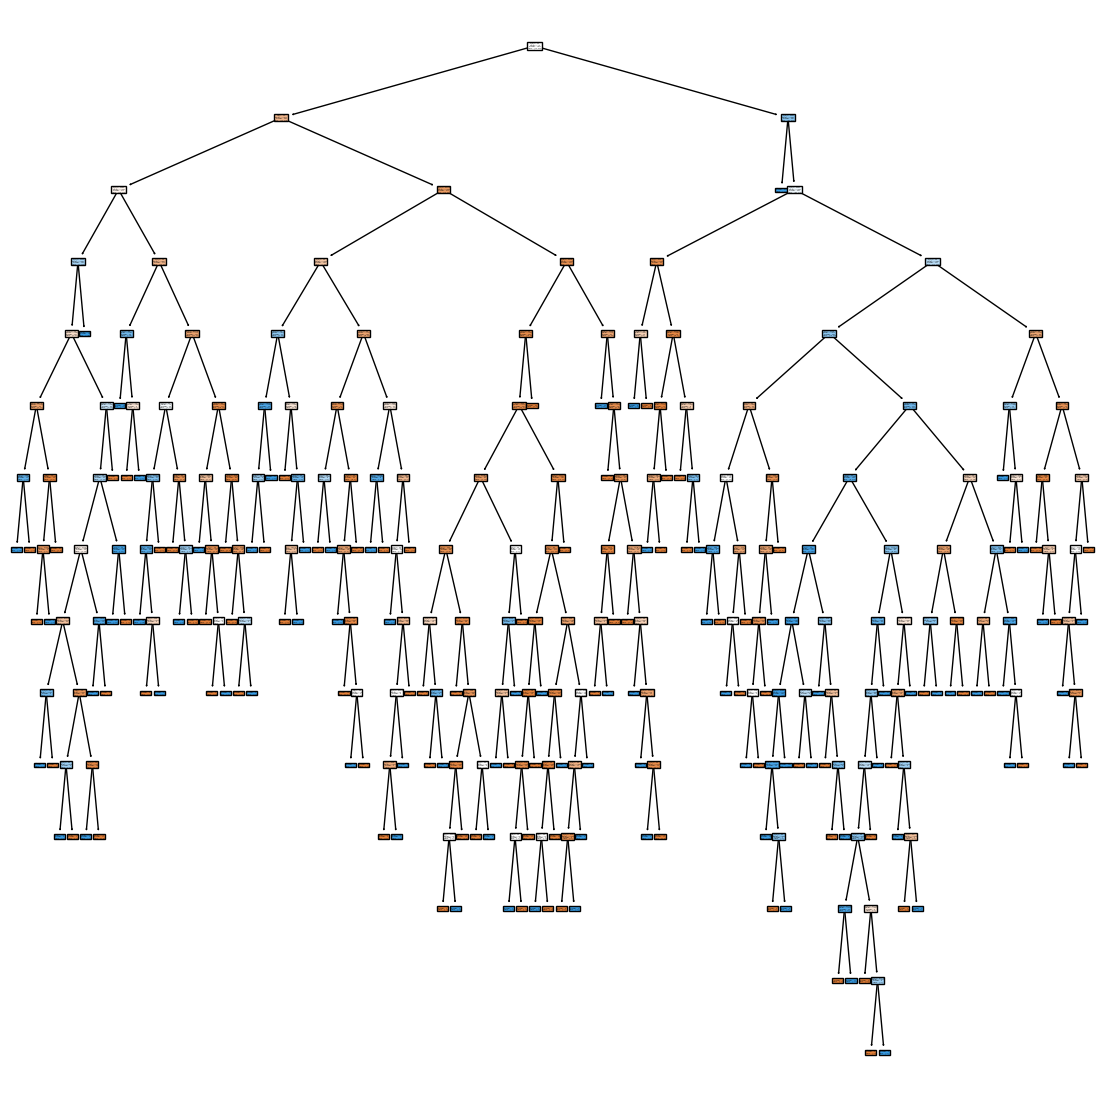

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(model, filled = True);

Notice that
- how deep is this DT is


#### How do we stop it from overfitting ?

We'll learn about how to handle bias variance tradeoff in DT in next lecture

## Points to Remember

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/804/original/Screenshot_2023-07-28_at_11.15.09_AM.png?1690525651 width=700>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/805/original/Screenshot_2023-07-28_at_11.15.18_AM.png?1690525674 width=700>

## Visualizing the process of building DT



link: https://drive.google.com/file/d/1CBFhQ2bYf81kTN-x_T6B1hcbIVqbXjAz/view?usp=sharing

paper: https://opus.bibliothek.uni-augsburg.de/opus4/frontdoor/deliver/index/docId/79711/file/ECML_PKDD_Decision_Tree_Learning.pdf

Steps to follow:
1. Unzip the file
2. Launch index.html to launch the project
3. Go to Data (top right) -> Import training data -> data.csv

4. Dataset are present in folder named "Files". You can move your custom dataset into that folder. However, there are few limits on number of columns and format of data (csv)

It contains data for attrition use case (3 features)
- Gender
- Age < 35
- Marital Status


4. Select Mode as "Stepwise". It'll build DT node by node.

5. Click on build.

6. Click build again to move to next stage of DT

For each stage, you can view the information gain on left pane of window.




<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/170/862/original/decision_tree_learning_zip.png?1765807676' width = 700>


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/170/863/original/gif_process_of_building_DT.gif?1765807717' width=800>




## Gini Impurity

Similar to entropy, Gini is also
- A measure of impurity of nodes.




### Optional: Why Gini Impurity ?



#### Issue with Entropy



Do you recall how entropy is calculated?
- $H(y) = - ∑_{i=1}^k p(y_i)log(p(y_i))$


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/087/original/Screenshot_2023-07-31_at_10.27.33_AM.png?1690780005 width=700>


\
So, what's the problem?
- Notice that we take log of probability.
- We have to do this for each feature, at each node.

This is **computationally expensive** and **time consuming**.

\

That's when **Gini Impurity** comes into picture.


### But how do we calculate Gini Impurity?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/088/original/Screenshot_2023-07-31_at_10.27.40_AM.png?1690780045 width=700>

### Visualizing Gini Impurity

Desmos plot: https://www.desmos.com/calculator/yhcwubphxs

In [ ]:
from IPython.display import IFrame

IFrame(src="https://www.desmos.com/calculator/yhcwubphxs", width=700, height=375)

### How do we calculate Information Gain for Gini Impurity?

$IG = GI_{parent~node} - Weighted~GI_{child~nodes}$

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/091/original/Screenshot_2023-07-31_at_10.28.04_AM.png?1690780165 width=700>

## How to split on numerical features?

I hope you remember that our data contains both,
- Categorical features
- Numerical features

\
We already know that for Categorical feature,
- DT splits data based on distinct categories.

<img src= https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/092/original/Screenshot_2023-07-31_at_10.28.12_AM.png?1690780208 width=700>

#### What happens when we have a Numerical feature?

DT uses a **threshold-based approach**.

  - Consider a numerical feature $f_1$ with $n$ different values.
  - We select a threshold value (say $n_i$) that splits the data into two subsets.
  - This is done on the basis of a condition such as:
    - $f_1 < n_i$
    - $f_1 > n_i$
    - $f_1 = n_i$

\
#### But how do we choose the threshold?

The goal is to find the $threshold+condition$ that gives us **maximum information gain** after splitting.



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/093/original/Screenshot_2023-07-31_at_10.28.20_AM.png?1690780248 width=700>


1. Arrange the values in $f_1$ in increasing order
2. Set each value of $f_1$ i.e. ($n_1$, $n_2$, $n_3$,..) as threshold
3. Calculate the IG of the split for all values

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/094/original/Screenshot_2023-07-31_at_10.28.26_AM.png?1690780348 width=700>


4. Which gives us $n$ IG values say IG$_1$, IG$_2$, IG$_3$ ... IG$_n$
5. Choose whichever threshold gives the highest IG.

#### Do you see any problem in splitting on numerical features?

\
**Time Complexity**
  - For a feature with 1000 different values,
  - We have to compute 1000 different splits.
  - This is very unefficient.

\


#### How can we make it more efficient?

By binning the feature values.
  - Suppose we have an `Age` column.
    - Range: [20, 60]


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/095/original/Screenshot_2023-07-31_at_10.28.37_AM.png?1690780522 width=700>


  - We can bin the values into `Age Groups`.
    - Bins: [20, 30), [30, 40), [40, 50), [50, 60]

## Overfit Vs Underfit


#### Recall when we calculated the train & test accuracy for our DT -

- Accuracy -
  - Train: 1.0
  - Test: 0.76


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/096/original/Screenshot_2023-07-31_at_10.28.44_AM.png?1690780545 width=700>

\
#### What can we conclude from this?

- There's a big difference in training & test accuracy.
- It means, the DT model is **overfitting** the data.

\
#### When do you think a DT will **overfit**?

If all the leaf nodes are pure then,
- the DT would have 100% accuracy on training set.

\
#### Why does DT overfit as the depth increases?

Imagine we have 1000 data points.
- as the depth increases, the data set becomes smaller.

By the time we reach the leaf node,
- there will be fewer points.
- these points coule be noise/outliers.

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/097/original/Screenshot_2023-07-31_at_10.28.51_AM.png?1690780598 width=700>








This results in **Overfitting**.



```
Quiz 2:

Which of the following statements is true about overfitting in decision trees?

A. It leads to high bias and high variance.
B. It leads to low bias and high variance.
C. It leads to high bias and low variance.
D. It leads to low bias and low variance.

ANS: B. It leads to low bias and high variance.
```

#### How can we resolve this problem?
  
  - Stop splitting nodes before they become pure.
  - Or in simpler terms, by reducing the **Depth of the DT**.

```
QUIZ 3:

What is pruning in decision trees?

A. The process of removing outliers
B. The process of handling missing values
C. The process removing unnecessary branches
D. process of transforming categorical variables

ANS: C. The process removing unnecessary branches.
```

#### But what if the depth is too low?

\
Typically, we let the tree grow until we get a pure node.

What if we stop the tree growth at a depth=2?














This would mean...
- Lot of -ve points might also fall in that leaf node,
- and they'll be incorrectly classified as +ve.

\
This results in **Underfitting**.

\
If the tree depth is less,
- it means the splits are less.

Hence, **number of hyper-planes dividing the data space are less** </br> i.e., less variance and more bias.

#### Extreme Case

```
QUIZ 4:

What if the tree depth is zero?

It'll mean that the tree has
A. a single node
B. at most 2 nodes
C. at most 3 nodes

ANS: A. a single node

```

**Conclusion:**

- A **deep tree** usually Overfits the training data.
- A **shallow tree** usually Underfits the training data.



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/098/original/Screenshot_2023-07-31_at_10.28.58_AM.png?1690780751 width=700>

### Tradeoff

#### How do we find the right depth of our DT?

Our goal is to -
- not overfit outliers
- not underfit training samples

\
The idea here is to -
- treat **depth** as a hyperparameter
- and find its optimal value.

---

## Hyperparameters

Let's look at various DT hyperparmeters available in the sklearn library.

<img src='https://drive.google.com/uc?id=1z8KTHw3qq0wonrM-zxnSD_Tunh477zLv'>

sklearn DT - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#### What does each of these hyperparameters do?

\
- **Criterion**:
  - Defines which impurity measure to use.
  - By default, it is set to Gini Impurity.
  
- **max_depth**:
  - Defines maximium depth upto which a tree will grow.
  - By default, it is **None** i.e.
  - it'll grow until all leaves are pure.

- **min_samples_split**:
  - Defines the minimum no. of datapoints required to split further.
  - Helps control depth which therefore prevents **overfit**.
  - By default, it is 2.

- **min_samples_leaf**:
  - Defines the minimum no. of samples a leaf node can have.

- **max_leaf_nodes**:
  - Defines the maximum no. of leaf nodes a tree can have.

- **max_features**:
  - Selects features to be used while deciding the best split.
  - By default, it considers all the features for split.

- **class_weight**:
  - Assign weights to different classes during training.
  - Helps in dealing with imbalanced data.


#### Tuning the **max_depth** hyperparameter to improve the model performance.

\
We try multiple values of depth.
- Train DTs using various depth values.
- Check the CV error for each value.
- Choose the one which gives lowest CV error.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 120MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 48.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 25.1MB/s]


In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score

kfold = KFold(n_splits=10)

depths = [3,4,5,67,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth:3 Accuracy Mean: Train: 78.23483177413387 Validation: 76.47326674500587
K-Fold for depth: 3 Accuracy Std: Train: 1.203088267164511 Validation: 11.331241420327677
***************
K-Fold for depth:4 Accuracy Mean: Train: 83.50772540936214 Validation: 80.58049353701529
K-Fold for depth: 4 Accuracy Std: Train: 0.7889219949763586 Validation: 6.337951865133366
***************
K-Fold for depth:5 Accuracy Mean: Train: 87.36180052847033 Validation: 81.88366627497062
K-Fold for depth: 5 Accuracy Std: Train: 0.7888615077334944 Validation: 7.73770036081666
***************
K-Fold for depth:67 Accuracy Mean: Train: 100.0 Validation: 83.1316098707403
K-Fold for depth: 67 Accuracy Std: Train: 0.0 Validation: 10.55717457918392
***************
K-Fold for depth:9 Accuracy Mean: Train: 97.31242628012397 Validation: 83.7256169212691
K-Fold for depth: 9 Accuracy Std: Train: 0.3868329573758325 Validation: 10.103313333296661
***************
K-Fold for depth:11 Accuracy Mean: Train: 99.1101215

#### Training with the best parameters

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=7, max_depth=4)
tree_clf=tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)

---

## How to **visualize** a DT?

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_train.columns)

# Ensure the target variable 'Attrition' is not there in the feature list

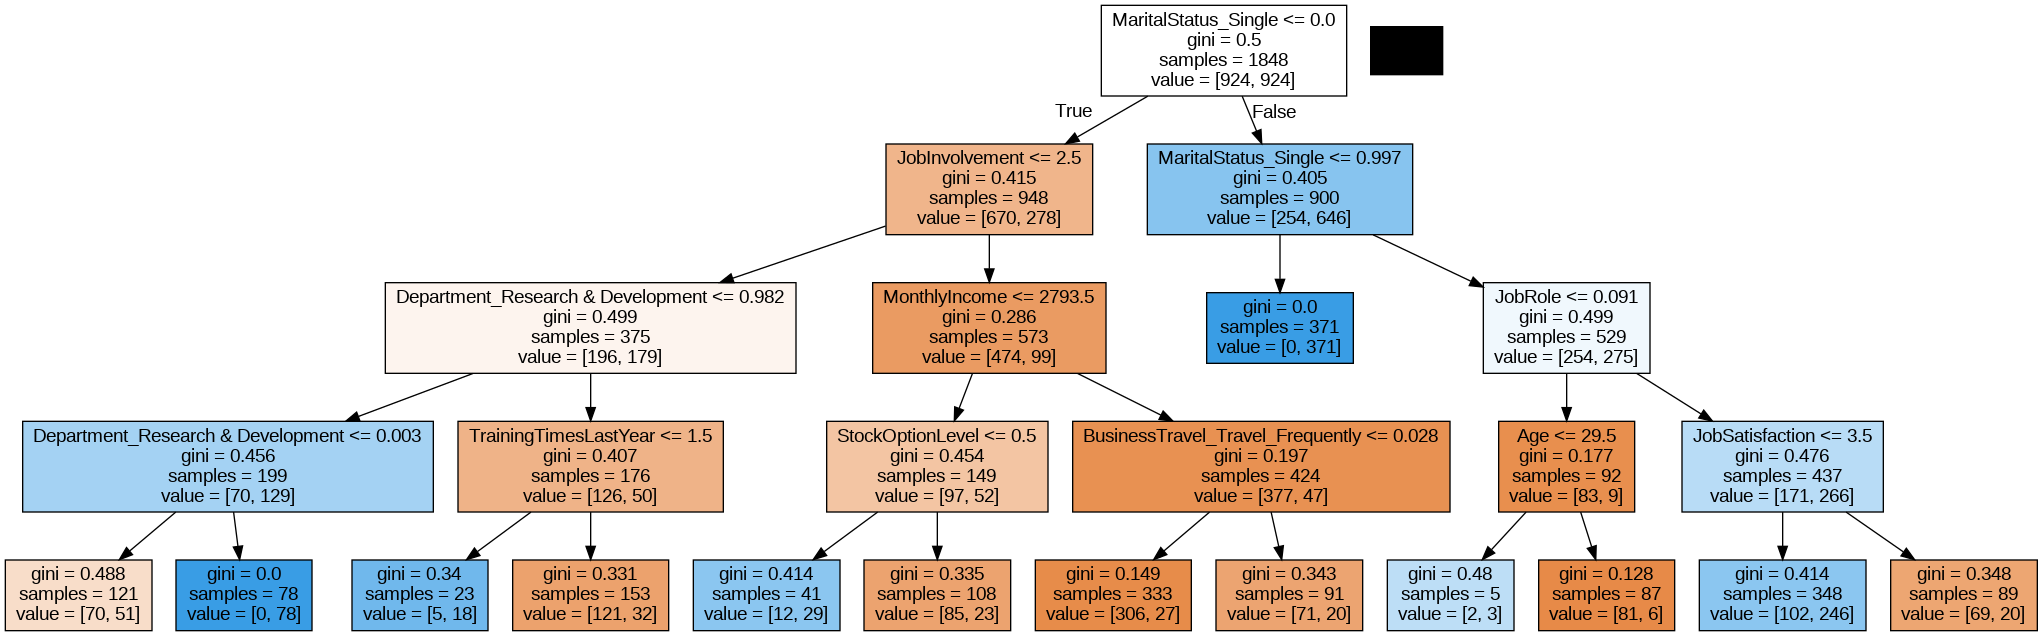

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Did you notice the depth of the tree?
- Neither too large
- Nor too low

\
#### What can we infer from this?

If you notice the leaves,
- not all of them are pure.
- This means lesser variance.

### Confusion Matrix

Plotting the confusion matrix for test data -

Recall the **TP**, **TN**, **FN**, **FP** we discussed earlier.


Text(0.5, 23.52222222222222, 'Predicted label')

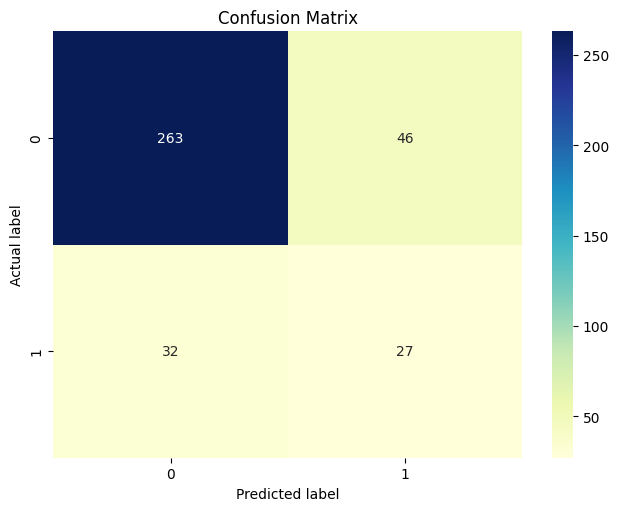

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

What did you notice?

- Model is classifying class 0 quite well.
- However, the number of FN is large.

## Feature Importance

#### How can we find which parameters are contributing more towards a prediction?

- This is where **feature importance** comes into picture.

\
#### How can we get Feature Importance for DT?

Suppose we have 10,000 datapoints at root node.
- A feature $f_i$ is used twice in splitting a DT.
- At first split,
  - No. of data points be 5,000 ($n_1$)
  - Infromation Gain is IG$_1$
- At second split,
  - No. of data points be 500 ($n_2$)
  - Infromation Gain is IG$_2$

\
We calculate feature importance of $f_i$ by


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/103/original/Screenshot_2023-07-31_at_10.29.46_AM.png?1690781118 width=700>

This is called **normalized information gain.**

- We calculate normalized information gain for all features.
- This Normalized IG value is used as feature importances.

\
**NOTE:**
- This is just one of the popular way of calculating feature importance.
- Different libraries may use different methods of calculating it.

#### Code Walkthrough

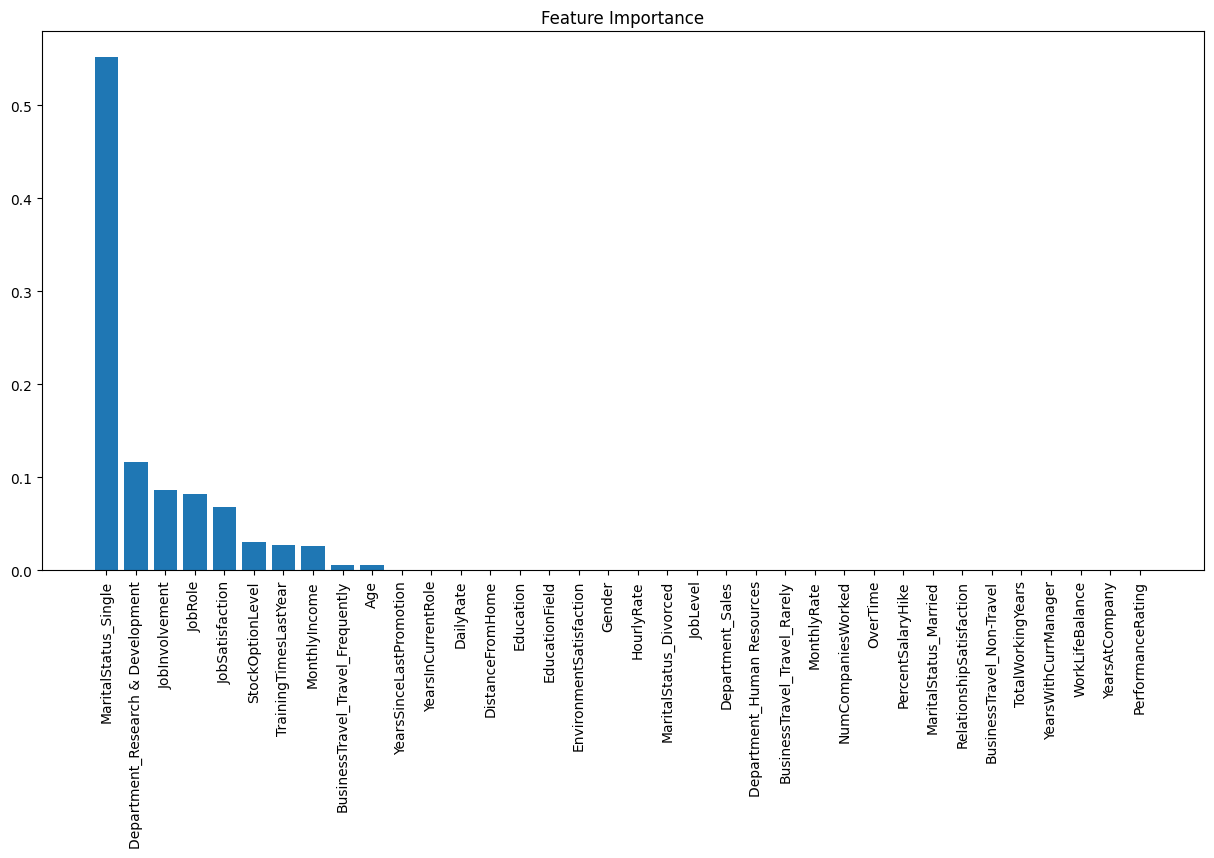

In [ ]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

## Interview questions



> #### Important Terminologies

* The deeper you go building a tree that means you're reducing the no. of elements in your leaf node. This is known as **Deep Tree**. This leads to an **overfit** condition.

* Let's say if we have only one node. It means the depth of the tree is only 1 level. This is known as **Decision Stump**. Then this will result to an **underfit** condition.

* When we have a tree with smaller depth, we call it as a **Shallow Tree**. Note that a shallow tree has very less decision boundaries.

</br>

<img src='https://drive.google.com/uc?id=1SXaFV_TBifAsggqWdFLhBiHhw-ZNFR1X' height='300' width='600'>





> #### Q. Where do you think the impact of an **outlier** will be higher?

A **deep tree** or A **shallow tree**

The impact of an outlier will be lower on a shallow tree since here in the leaf node, we will have multiple values.

But in case of a deep tree, we might end up having only the outlier value present in the leaf node.

</br>



> #### Q. What if we have imbalanced data? Will the DT be impacted by it?

Yes, the decision tree will surely be affected by the imbalanced dataset.

Say,
- $y+ = 99%$
- $y- = 1%$

We could use **Oversampling/Undersampling** methods or **SMOTE** technique that we learnt earlier.

</br>


> #### Q. Does a DT requires standardised data?

Nope!

- Imagine we have a numerical feature $f_i$\
  and we standardize it.



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/099/original/Screenshot_2023-07-31_at_10.29.09_AM.png?1690780787 width=700>

- But, does Impurity depends on values? \
Nope!
  - it depends on number of +ve/ -ve datapoints
  - and in turn dependend upon the thresold

\
- So standardisation won't change/affect the threshold.
- Hence, standardization doesn't impact the Entropy & IG.


> #### Q. How much space is required to keep a DT in memory? How much time it'll require to run?

Suppose,
- $'m'$ is the **no. of nodes** in the decision tree.
- $'d'$ is the **depth** of the decision tree.
- $'f'$ is the **no. of features** present in the data.

Then,
- Space complexity - $O(m)$
- Runtime Complexity - $O(d)$
- Build time - $O(nlogn * f)$

</br>



> #### Q. Can we use a DT for **multi-class classification**?

Yes, we surely can.

Suppose at the leaf node, we get the no. of values belonging to either one of the three given labels as -

- $y1$ = 300
- $y2$ = 20
- $y3$ = 10

We can say that the sample belongs to the y1 class.

</br>



> #### Q. Can we use the same column for multiple splits?

Let us see 3 different cases for this -

</br>

$Case-1$ : NO </br>
<img src='https://drive.google.com/uc?id=1ytrn6vMCLoROeEL8-l0-HWge1aDZMmRu' height='300' width='500'>

</br>

$Case-2$ : YES </br>
<img src='https://drive.google.com/uc?id=1UbKSasKICsMJKCW5OP4Q-TGn1odPUHlK' height='300' width='500'>

</br>

$Case-3$ : YES </br>
<img src='https://drive.google.com/uc?id=1urQ5xiqmB5P0uNDeRsa7rdNwmRQgMLjQ' height='300' width='500'>

</br>



> #### Q. If we're using a feature in multiple splits, how do we determine which feature is more important?

</br>

<img src='https://drive.google.com/uc?id=1iVKigh5sIwvEQSUBPmSjmoWO-3Bipwjd' height='400' width='600'>

</br>



> ### Q. How to use decision trees for **Regression**?



Let's understand this with an example


Suppose we have data of marks scored by students
- along with some bunch of categorical/ numerical features  ($f_1, f_2, f_3, f_4$)

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/104/original/Screenshot_2023-07-31_at_10.29.53_AM.png?1690781155 width=700>

Using this data, we want to predict the marks.

Remember that,
- in regression problem, target variable (marks) is continuous.



#### So, how does decision tree handle continous target variable ?

In order to so, let's breakdown the process DT follows:
- It calculates the impurity
- Splits the node to reduce the impurity
- Makes the predictions i.e. calculate predicted value

In short, we need to find answers to following questions:

- **How do we calculate impurity in case of regression ?**
- **How do we calculated predicted value at each node ?**

Let's try answering these questions

#### How to calculate impurity ?

**How did we calculate impurity in case of classification?**

We did so by calculating entropy/gini index.


**Can we use the same over here as well?**

- We can't.
    
    **Why?**
    
    coz both of these involve calculating probabilities
    - and regression doesn't have probabilities


**What shall we use instead ?**


Instead, we use **MSE**


Now, in order to calculate MSE, we need two things
- **Actual** target values (we already have these)
- **predicted** target values (we don't have these)


which brings us to our next question

#### How to calculate predicted value ?

```
QUIZ 8:

What do you think DT's approach for calculating predicted value for regression?


A. Majority vote
B. Take mean of all values present at given node.
C. Select random value out of present target values at given node.
D. Takes first present values as predicted value


ANS: B. Take mean of all values present at the given node.
```

Decision Trees makes the prediction by simply
- taking **average of all values present at node**. i.e. mean value.

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/107/original/Screenshot_2023-07-31_at_10.30.24_AM.png?1690781264 width=700>